In [1]:
from DLtools.Data import instant_data,station_sel
from DLtools.feature_sel import *

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# Loading Data 

In [2]:
###### SETTING AREA ################
loading = instant_data()
df,mode = loading.hourly_instant(),'hour'
# df,mode = loading.daily_instant(),'day'
if mode =='hour': n_past,n_future = 24*7,72
elif mode =='day': n_past,n_future = 60,30

st = 'CPY012'
target,start_p,stop_p,host_path=station_sel(st,mode)

save_path = host_path

<AxesSubplot:xlabel='date'>

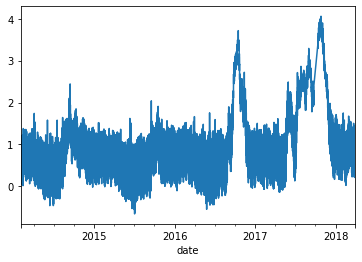

In [3]:
df = df[start_p:stop_p]
data = df

data['Day'] = data.index.dayofyear #add day
data = data.interpolate(limit=300000000,limit_direction='both').astype('float32')#interpolate neighbor first, for rest NA fill with mean() #.apply(lambda x: x.fillna(x.mean()),axis=0)
data[target].plot()


In [4]:
data = call_mar(data,target,mode,cutoff=0.2)

# Check Corr

<AxesSubplot:>

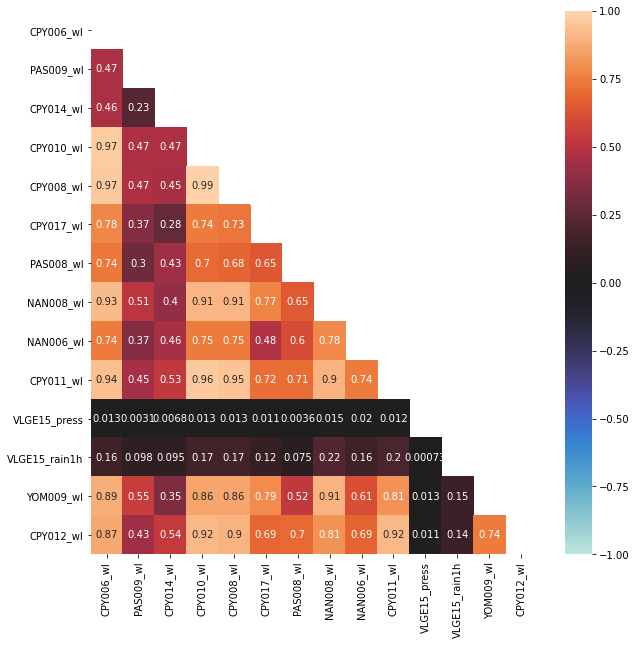

In [15]:
plt.subplots(figsize=(10,10))
mask = np.triu(data.corr())
sns.heatmap(data.corr(), annot = True, vmin=-1, vmax=1, center= 0,mask=mask)

# PCA analysis

In [17]:
x = data.drop([target],axis=1)
x = scale(x)
covar_matrix = PCA(n_components = x.shape[1])
covar_matrix.fit(x.T)

PCA(n_components=13)

In [23]:

print(covar_matrix.components_)
# print(covar_matrix.explained_variance_)


[[ 1.6846211e-03  1.6918982e-03  1.6978072e-03 ... -6.7266956e-04
   5.7870205e-03  1.1751292e-03]
 [-8.5482275e-04 -8.2673196e-04 -7.9458655e-04 ... -2.6448560e-03
   1.2080124e-02  1.7629463e-03]
 [ 9.5617480e-04  3.4066587e-04 -3.1992988e-04 ...  2.6202819e-03
   1.4126829e-03  2.1713208e-03]
 ...
 [-3.1698232e-03 -2.8896010e-03 -2.5320109e-03 ...  9.7905258e-03
   9.7829560e-03  8.2226396e-03]
 [ 3.7074779e-04  6.3897576e-04  4.3664163e-04 ... -1.5992033e-03
  -6.5237033e-04 -1.5110809e-03]
 [ 4.2778823e-01 -1.7891508e-01 -3.4822276e-01 ...  2.2903988e-03
   1.0614836e-03  1.2272093e-06]]


In [18]:
PC_transform = covar_matrix.transform(x.T)
####################
pc_col = []
for i in range (PC_transform.shape[1]):
  pc_col.append('component_'+str(i+1))
#########################
principalDf = pd.DataFrame(data = PC_transform, columns = pc_col)

finalDf = pd.concat([principalDf, pd.Series(data.columns.T)],axis=1)
finalDf.set_index(0).to_csv('MAR/pca_hour_excludeTarget.csv')
finalDf.set_index(0)

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,component_11,component_12,component_13
0,,,,,,,,,,,,,
CPY006_wl,-57.092808,-7.300119,-3.428935,-16.662458,-6.870480,-5.798582,-17.916758,9.419241,-14.457981,-12.516402,22.761209,-0.637689,-0.000028
PAS009_wl,30.469311,10.675458,-76.165497,134.434967,13.422568,29.012009,-8.495286,-7.998716,0.605172,-1.329650,1.079859,0.006763,-0.000017
CPY014_wl,39.458118,-0.496849,132.765533,64.199181,18.044256,-55.121483,9.808988,2.601442,0.034629,-2.867595,-0.913588,0.099702,0.000011
CPY010_wl,-55.508385,-4.460290,-1.190500,-13.364425,-18.848248,-9.178979,-30.571129,-12.614068,-11.379924,-0.695629,-7.956987,13.395857,-0.000015
CPY008_wl,-55.137474,-3.991511,-4.320720,-13.825373,-22.860689,-10.179122,-30.279516,-12.611805,-14.534725,-7.407269,-13.276763,-10.706052,-0.000009
CPY017_wl,-34.303333,-12.136728,-39.777016,-37.491589,76.706482,-24.908127,47.807777,-30.705446,-0.851392,-1.546318,0.774250,-0.053932,0.000049
PAS008_wl,-22.205450,-21.481287,47.195816,-22.922258,73.139755,78.854652,-17.476538,20.988653,0.511261,3.126244,-3.703346,-0.257493,0.000031
NAN008_wl,-48.402184,6.093028,-22.745047,-11.433352,-24.394089,-3.976084,17.696054,19.434776,33.738640,-17.297176,-5.245294,1.209929,-0.000026
NAN006_wl,-19.143534,1.971602,39.887539,0.884497,-71.666489,58.815594,55.517685,-10.232527,-8.833252,4.965069,1.318132,-0.199847,0.000007


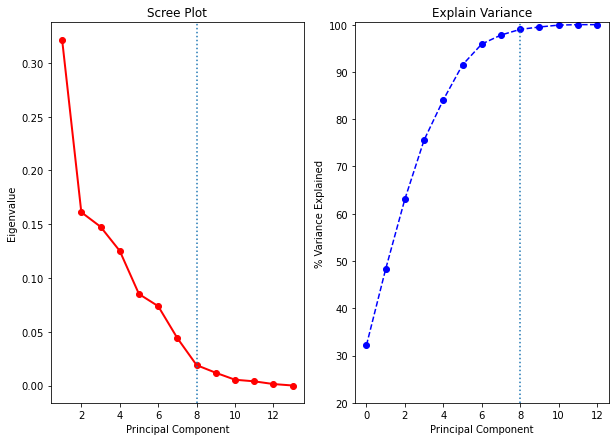

In [21]:
fig,ax = plt.subplots(1,2, figsize=(10,7))
##########################################
PC_values = np.arange(covar_matrix.n_components_) + 1
ax[0].plot(PC_values, covar_matrix.explained_variance_ratio_, 'ro-', linewidth=2)
ax[0].set_title('Scree Plot')
ax[0].set_xlabel('Principal Component')
ax[0].set_ylabel('Eigenvalue')


########################################
variance = covar_matrix.explained_variance_ratio_
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
ax[1].set_ylabel('% Variance Explained')
ax[1].set_xlabel('Principal Component')
ax[1].set_title('Explain Variance')
ax[1].set_ylim(20,100.5)
ax[1].plot(var,'--bo')

#####################################
ax[0].axvline(8,linestyle=':')
ax[1].axvline(8,linestyle=':')
plt.savefig('MAR/PCA_analysis_excludeTarget.png', dpi=300, bbox_inches='tight')

In [58]:
# pca = PCA(n_components = 8 )

# split_date = '2017-01-01'
# train,test = data[:split_date],data[split_date:]

# pca.fit(data)
# train_pca = pca.transform(train)
# test_pca = pca.transform(test)